<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/Text_neural3/text_classification2_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте усі датафрейми
* Добавте до кожного стовпчик `labels` з відповідним йому класом(bussiness, sports, education, etc). назви класів беріть з назв файлів
* Об'єднайте всі датафрейми в один, див [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
* Створіть стовпчик `text` в якому зберігатиметься текст для подальшої роботи. Можети вибрати такі варіанти:
  * Взяти один зі стовпчиків `headline`, `description`, `content`
  * Об'єднати тексти зі стовпчиків `headline`, `description`, `content`
* Видаліть стовпчики `headline`, `description`, `content`, `url`
* Розділіть дані на тренувальні та тестові
* Застосуйте `TfidfVectorizer`
* Натренуйте модель
* Виведіть результати

**Додатково**
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застусуйте один з варіантів:
  * стематизація
  * лематизація(використайте `nltk.pos_tag` для визначення частини мови)
  * обидва варіанти
* Використайте `n-gram` для класифікації(можливо доведеться збільшити `max_features`)
* Натренуйте різні моделі:
  * [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
  * [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="rbf"`
  * [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
* Використайте `optuna` для підбору гіперпараметрів


# Дані про статті

In [33]:
import pandas as pd

df1 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/business_data.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/education_data.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/entertainment_data.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/sports_data.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/technology_data.csv")

In [34]:
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

combined_df

,headlines,description,content,url,category
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
...,...,...,...,...,...
9995,Vivaldi’s privacy and customisability-focused ...,The Vivaldi browser is now available on iOS an...,"Vivaldi, the free browser founded by Opera co-...",https://indianexpress.com/article/technology/t...,technology
9996,"From Meta Quest 3 to Ray Ban Smart Glasses, he...",The future is here. Meta unveils its next-gen ...,"Meta has concluded its Connect 2023 event, unv...",https://indianexpress.com/article/technology/t...,technology
9997,Samsung Galaxy S24 rumoured to launch on Janua...,Samsung might shift the launch window of its u...,Samsung has been launching its Galaxy S series...,https://indianexpress.com/article/technology/m...,technology
9998,"‘We continuously iterate… building prototypes,...",Dyson's success in floorcare tech lies in inno...,"“When things don’t go as planned, we return to...",https://indianexpress.com/article/technology/t...,technology


In [35]:
combined_df['text'] = combined_df['headlines'].fillna('') + " " + combined_df['description'].fillna('') + " " + combined_df['content'].fillna('')

combined_df.rename(columns={'category': 'labels'}, inplace=True)

df = combined_df[['labels', 'text']]

df

,labels,text
0,business,Nirmala Sitharaman to equal Morarji Desai’s re...
1,business,"‘Will densify network, want to be at least no...."
2,business,Air India group to induct an aircraft every si...
3,business,Red Sea woes: Exporters seek increased credit ...
4,business,Air India group to induct a plane every 6 days...
...,...,...
9995,technology,Vivaldi’s privacy and customisability-focused ...
9996,technology,"From Meta Quest 3 to Ray Ban Smart Glasses, he..."
9997,technology,Samsung Galaxy S24 rumoured to launch on Janua...
9998,technology,"‘We continuously iterate… building prototypes,..."


In [36]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [37]:
# class MyTokenizer:
#      def __init__(self):
#          self.some_args = None
#      def __call__(self, text):
#          return text.split()

In [38]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

class MyTokenizer:
    def __init__(self, use_stemming=False, use_lemmatization=True):
        self.use_stemming = use_stemming
        self.use_lemmatization = use_lemmatization
        self.stemmer = PorterStemmer() if use_stemming else None
        self.lemmatizer = WordNetLemmatizer() if use_lemmatization else None

    def __call__(self, text):
        tokens = nltk.word_tokenize(text)
        if self.use_stemming:
            tokens = [self.stemmer.stem(token) for token in tokens]
        if self.use_lemmatization:
            tokens = [self.lemmatizer.lemmatize(token, self.get_wordnet_pos(token)) for token in tokens]
        return tokens

    def get_wordnet_pos(self, word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

tokenizer = MyTokenizer(use_stemming=True, use_lemmatization=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\klimk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\klimk\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\klimk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words='english')

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

C:\Users\klimk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\klimk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'el', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'far', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'make', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'plea', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon',

In [7]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 906481 stored elements and shape (8000, 113415)>

In [9]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(8000)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [10]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [13]:
(X_train == 0).sum()

0

In [11]:
import numpy as np

np.where(pca.explained_variance_ratio_.cumsum() >= 0.9)

(array([5245, 5246, 5247, ..., 7997, 7998, 7999], dtype=int64),)

In [14]:
X_train.shape

(8000, 8000)

In [22]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(class_weight="balanced")

# model.fit(X_train, y_train)

#                precision    recall  f1-score   support

#      business       0.97      0.98      0.98       400
#     education       0.99      0.99      0.99       400
# entertainment       1.00      1.00      1.00       400
#        sports       0.99      1.00      0.99       400
#    technology       0.99      0.97      0.98       400

#      accuracy                           0.99      2000
#     macro avg       0.99      0.99      0.99      2000
#  weighted avg       0.99      0.99      0.99      2000

LogisticRegression(class_weight='balanced')

In [20]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(class_weight="balanced")

# model.fit(X_train, y_train)

#                precision    recall  f1-score   support

#      business       0.90      0.51      0.65       400
#     education       0.68      0.96      0.79       400
# entertainment       0.96      0.97      0.96       400
#        sports       0.95      0.97      0.96       400
#    technology       0.92      0.91      0.91       400

#      accuracy                           0.86      2000
#     macro avg       0.88      0.86      0.86      2000
#  weighted avg       0.88      0.86      0.86      2000

DecisionTreeClassifier(class_weight='balanced')

In [24]:
# from sklearn.naive_bayes import GaussianNB

# model = GaussianNB(
#     priors=None,
#     var_smoothing=1e-9
# )

# model.fit(X_train, y_train)

#                precision    recall  f1-score   support

#      business       0.00      0.00      0.00       400
#     education       0.20      1.00      0.34       400
# entertainment       0.00      0.00      0.00       400
#        sports       0.67      0.04      0.08       400
#    technology       0.00      0.00      0.00       400

#      accuracy                           0.21      2000
#     macro avg       0.17      0.21      0.08      2000
#  weighted avg       0.17      0.21      0.08      2000

GaussianNB()

In [28]:
# from sklearn.svm import SVC

# model = SVC(
#     kernel="rbf",
#     C=1.0,
#     gamma="scale",
#     class_weight="balanced",
#     random_state=42
# )

# model.fit(X_train, y_train)

#                precision    recall  f1-score   support

#      business       0.98      0.98      0.98       400
#     education       0.99      0.99      0.99       400
# entertainment       1.00      1.00      1.00       400
#        sports       1.00      1.00      1.00       400
#    technology       0.98      0.98      0.98       400

#      accuracy                           0.99      2000
#     macro avg       0.99      0.99      0.99      2000
#  weighted avg       0.99      0.99      0.99      2000

SVC(class_weight='balanced', random_state=42)

In [29]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.98      0.98      0.98       400
    education       0.99      0.99      0.99       400
entertainment       1.00      1.00      1.00       400
       sports       1.00      1.00      1.00       400
   technology       0.98      0.98      0.98       400

     accuracy                           0.99      2000
    macro avg       0.99      0.99      0.99      2000
 weighted avg       0.99      0.99      0.99      2000



[]

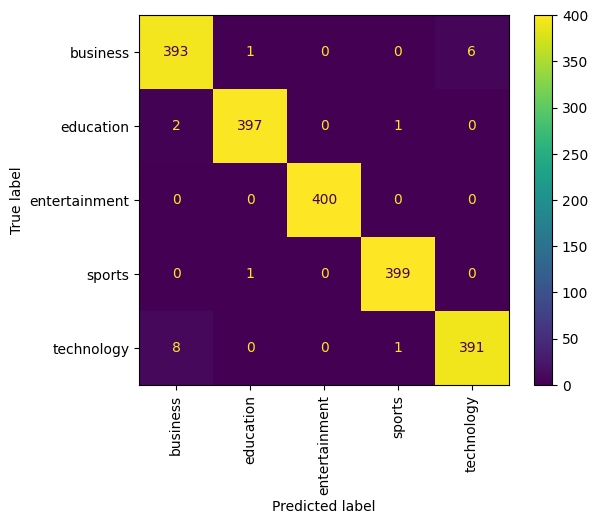

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [18]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ('vectorizer', vectorizer),
    ('pca', pca),
    ('model', model)
])

final_model

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words='english',
                                 tokenizer=<__main__.MyTokenizer object at 0x000001B5534F40E0>)),
                ('pca', TruncatedSVD(n_components=8000)),
                ('model', LogisticRegression(class_weight='balanced'))])